In [2]:
path = "training/velodyne/"
file = "000000.bin"

In [3]:
import numpy as np
import mayavi.mlab

path = "training/velodyne/"
file = "000000.bin"

pointcloud = np.fromfile(path+file, dtype=np.float32, count=-1).reshape([-1,4])
print(pointcloud.shape)

x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor
 
# vals='reflectance'
vals='height'
# vals='dist'

if vals == "height":
    col = z
if vals == "reflectance":
    col = r
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     col,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
#                      color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )
 
x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.show()

(115384, 4)


In [4]:
import numpy as np

path = "training/velodyne/"
file = "000000.bin"

pointcloud = np.fromfile(path+file, dtype=np.float32, count=-1).reshape([-1,4])
print(pointcloud.shape)

x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point

(115384, 4)


In [5]:
mask = x >= 0 # 正面的点
a = np.arctan(y/(x+0.0001))[mask]*180/np.pi  # angle
h = z[mask]*20                               # height
d = np.sqrt(x ** 2 + y ** 2 + z ** 2)[mask]  # Map Distance from sensor

In [6]:
mask60 = a ** 2 <= 3600 #正面120°的点
a = a[mask60]
h = h[mask60]
d = d[mask60]

In [7]:
q1,q3 = np.percentile(h, [25,75])
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

mask_h1 = h>lower  # 筛除超过边界的h
mask_h2 = h[mask_h1]<upper
a = a[mask_h1][mask_h2]
h = h[mask_h1][mask_h2]
d = d[mask_h1][mask_h2]

In [8]:
# Test
import mayavi.mlab
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x[mask][mask60], y[mask][mask60], z[mask][mask60],
                     z[mask][mask60],          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
#                      color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )
 
x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.show()

In [9]:
h.ptp()

85.92

In [10]:
a.ptp()

119.99821

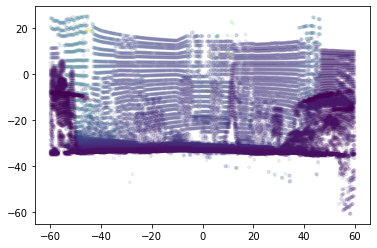

In [12]:
# 前方120°点的正视图，筛除了极值，颜色反应景深
import matplotlib.pyplot as plt
plt.scatter(-a, h, c=d, alpha=0.08, marker=".")
plt.show()

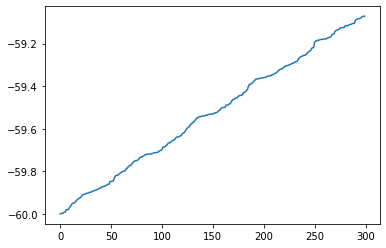

In [40]:
plt.plot(np.unique(a)[:300])

unique出现了阶梯样，这个应该是代表lidar射出的点角度上会有一定的偏差

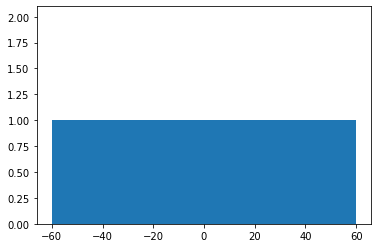

In [14]:
count,bins,img = plt.hist(a, bins=np.unique(a))

In [18]:
count.max()

2.0

这代表很少有点能在一个角度上

In [114]:
np.unique(h).size

2992

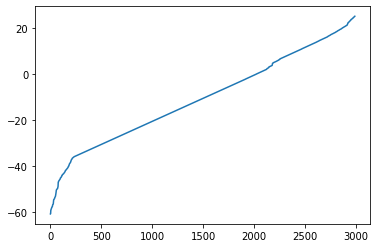

In [116]:
plt.plot(np.unique(h))

同理